## Importación de las librerías

In [2]:
import utils
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## Conjuntos de entrenamiento y test y CV controller

In [3]:
X_train, X_test, y_train, y_test = utils.get_train_test_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7776, 12) (1022, 12) (7776,) (1022,)


In [4]:
cv = utils.get_stratified_shuffle_cv()
print(cv)

StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8)


## Búsqueda del mejor SVC con kernel lineal

In [86]:
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 100, 1000]
}

grid_search_cv = GridSearchCV(
    SVC(kernel='linear', random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=2)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END .............................................C=0.01; total time=   1.5s
[CV] END .............................................C=0.01; total time=   1.4s
[CV] END .............................................C=0.01; total time=   1.5s
[CV] END .............................................C=0.01; total time=   1.4s
[CV] END .............................................C=0.01; total time=   1.4s
[CV] END .............................................C=0.05; total time=   1.1s
[CV] END .............................................C=0.05; total time=   1.1s
[CV] END .............................................C=0.05; total time=   1.1s
[CV] END .............................................C=0.05; total time=   1.1s
[CV] END .............................................C=0.05; total time=   1.1s
[CV] END ..............................................C=0.1; total time=   1.1s
[CV] END .......................................

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=SVC(kernel='linear', random_state=99),
             param_grid={'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 100,
                               1000]},
             scoring='roc_auc', verbose=2)

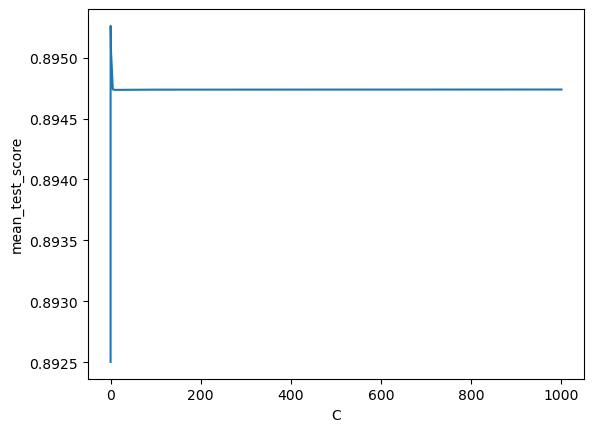

In [87]:
c_list = list(grid_search_cv.cv_results_['param_C'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
svc_lineal_df = pd.DataFrame(list(zip(c_list, mean_test_score_list)), columns=['C', 'mean_test_score'])
svc_lineal_df['mean_test_score_shift'] = svc_lineal_df['mean_test_score'].shift().fillna(0)
svc_lineal_df['diff'] = (svc_lineal_df['mean_test_score'] - svc_lineal_df['mean_test_score_shift'])
ax = sns.lineplot(data=svc_lineal_df, x="C", y="mean_test_score")

In [88]:
svc_lineal_df

,C,mean_test_score,mean_test_score_shift,diff
0,0.01,0.892502,0.000000,8.925024e-01
1,0.05,0.894765,0.892502,2.263070e-03
2,0.10,0.895072,0.894765,3.069633e-04
3,0.20,0.895261,0.895072,1.883413e-04
4,0.50,0.895206,0.895261,-5.518071e-05
5,1.00,0.895053,0.895206,-1.526556e-04
6,2.00,0.894974,0.895053,-7.864077e-05
7,5.00,0.894740,0.894974,-2.346006e-04
8,10.00,0.894736,0.894740,-3.965081e-06
9,100.00,0.894738,0.894736,1.982540e-06


## Búsqueda del mejor SVC con kernel poly

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

In [15]:
param_grid = {
    'C': [0.01, 0.1, 1, 2],
    'degree': [2, 3],
    'gamma': [0.1, 0.5, 1, 2]
}

grid_search_cv = GridSearchCV(
    SVC(kernel='poly', random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=2)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=0.01, degree=2, gamma=0.1; total time=   2.3s
[CV] END ........................C=0.01, degree=2, gamma=0.1; total time=   2.3s
[CV] END ........................C=0.01, degree=2, gamma=0.1; total time=   2.3s
[CV] END ........................C=0.01, degree=2, gamma=0.1; total time=   2.3s
[CV] END ........................C=0.01, degree=2, gamma=0.1; total time=   2.3s
[CV] END ........................C=0.01, degree=2, gamma=0.5; total time=   1.5s
[CV] END ........................C=0.01, degree=2, gamma=0.5; total time=   1.5s
[CV] END ........................C=0.01, degree=2, gamma=0.5; total time=   1.5s
[CV] END ........................C=0.01, degree=2, gamma=0.5; total time=   1.5s
[CV] END ........................C=0.01, degree=2, gamma=0.5; total time=   1.6s
[CV] END ..........................C=0.01, degree=2, gamma=1; total time=   1.2s
[CV] END ..........................C=0.01, degr

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=SVC(kernel='poly', random_state=99),
             param_grid={'C': [0.01, 0.1, 1, 2], 'degree': [2, 3],
                         'gamma': [0.1, 0.5, 1, 2]},
             scoring='roc_auc', verbose=2)

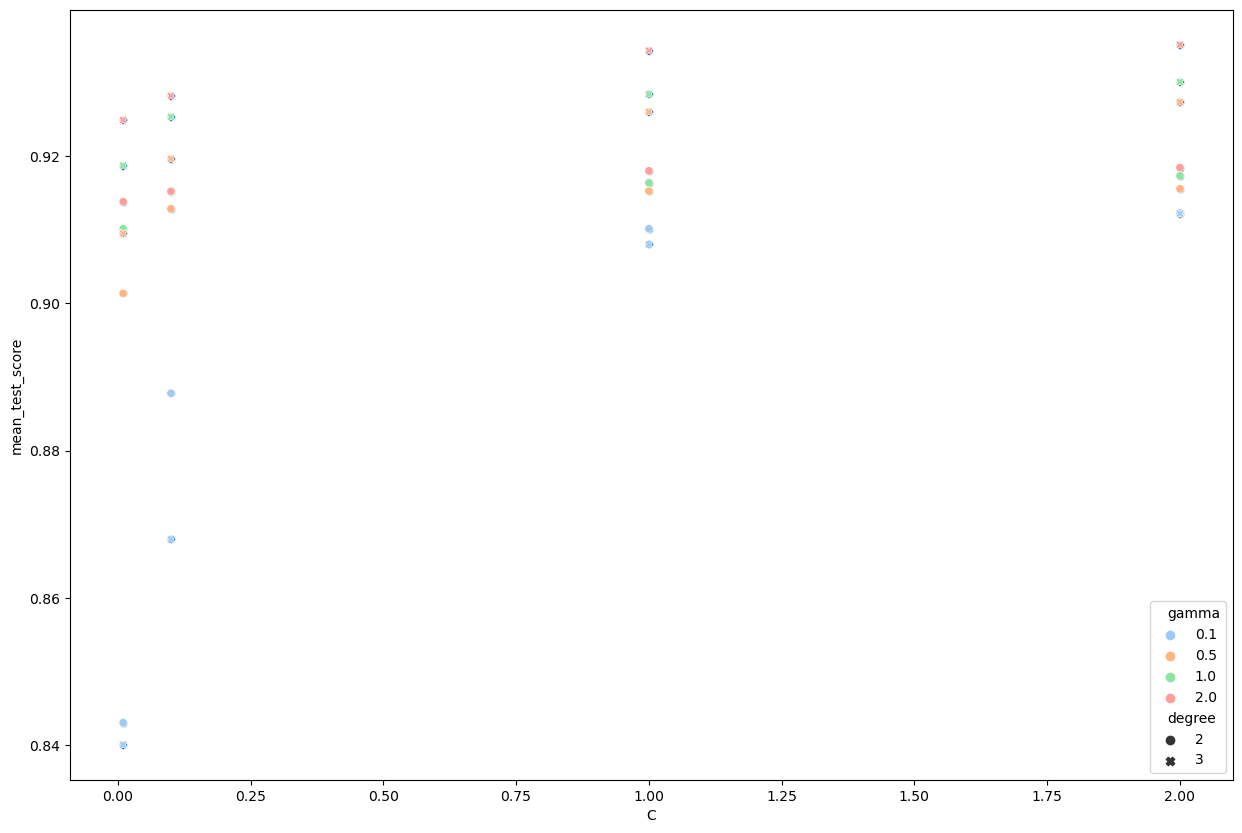

In [16]:
c_list = list(grid_search_cv.cv_results_['param_C'].data)
degree_list = list(grid_search_cv.cv_results_['param_degree'].data)
gamma_list = list(grid_search_cv.cv_results_['param_gamma'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
svc_poly_df = pd.DataFrame(list(zip(c_list, degree_list, gamma_list, mean_test_score_list)), columns=['C', 'degree', 'gamma', 'mean_test_score'])
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x="C", y="mean_test_score", data=svc_poly_df)
ax = sns.scatterplot(x="C", y="mean_test_score", data=svc_poly_df, hue='gamma', style='degree', palette='pastel')

In [17]:
svc_poly_df.sort_values(['degree', 'gamma', 'C'])[['degree', 'gamma', 'C', 'mean_test_score']]

,degree,gamma,C,mean_test_score
0,2,0.1,0.01,0.843058
8,2,0.1,0.10,0.887794
16,2,0.1,1.00,0.910153
24,2,0.1,2.00,0.912298
1,2,0.5,0.01,0.901350
9,2,0.5,0.10,0.912860
17,2,0.5,1.00,0.915260
25,2,0.5,2.00,0.915570
2,2,1.0,0.01,0.910156
10,2,1.0,0.10,0.915149


Escogemos **degree=3**, **gamma=0.5** y **C=0.01**

In [18]:
svc_poly_df[svc_poly_df.degree == 3].sort_values(['gamma', 'C'])[['gamma', 'C', 'mean_test_score']]

,gamma,C,mean_test_score
4,0.1,0.01,0.840050
12,0.1,0.10,0.867943
20,0.1,1.00,0.908008
28,0.1,2.00,0.912206
5,0.5,0.01,0.909504
13,0.5,0.10,0.919644
21,0.5,1.00,0.926023
29,0.5,2.00,0.927334
6,1.0,0.01,0.918727
14,1.0,0.10,0.925335


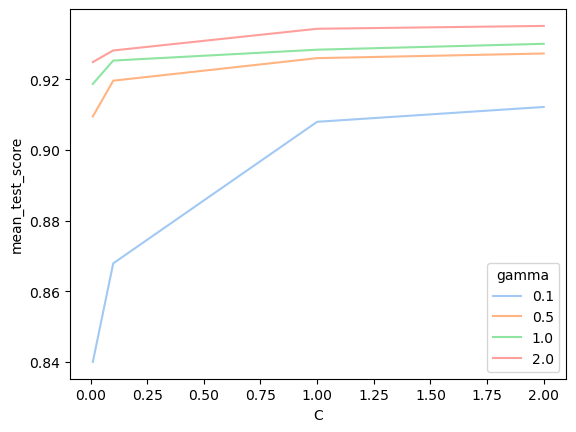

In [19]:
ax = sns.lineplot(x="C", y="mean_test_score", data=svc_poly_df[svc_poly_df.degree == 3], hue='gamma', palette='pastel')

## Búsqueda del mejor SVC con kernel RBF

In [20]:
param_grid = {
    'C': [0.01, 0.1, 1, 2, 5],
    'gamma': [0.1, 0.5, 1, 2]
}

grid_search_cv = GridSearchCV(
    SVC(kernel='rbf', random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=2)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..................................C=0.01, gamma=0.1; total time=   2.6s
[CV] END ..................................C=0.01, gamma=0.1; total time=   2.6s
[CV] END ..................................C=0.01, gamma=0.1; total time=   2.6s
[CV] END ..................................C=0.01, gamma=0.1; total time=   2.6s
[CV] END ..................................C=0.01, gamma=0.1; total time=   2.6s
[CV] END ..................................C=0.01, gamma=0.5; total time=   2.4s
[CV] END ..................................C=0.01, gamma=0.5; total time=   2.4s
[CV] END ..................................C=0.01, gamma=0.5; total time=   2.5s
[CV] END ..................................C=0.01, gamma=0.5; total time=   2.4s
[CV] END ..................................C=0.01, gamma=0.5; total time=   2.4s
[CV] END ....................................C=0.01, gamma=1; total time=   2.4s
[CV] END ....................................C=

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=SVC(random_state=99),
             param_grid={'C': [0.01, 0.1, 1, 2, 5], 'gamma': [0.1, 0.5, 1, 2]},
             scoring='roc_auc', verbose=2)

Escogemos **gamma=0.5** y **C=1**

<AxesSubplot:xlabel='C', ylabel='mean_test_score'>

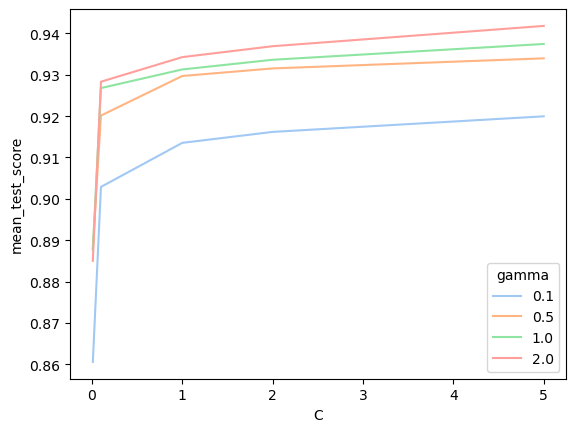

In [21]:
c_list = list(grid_search_cv.cv_results_['param_C'].data)
gamma_list = list(grid_search_cv.cv_results_['param_gamma'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
svc_rbf_df = pd.DataFrame(list(zip(c_list, gamma_list, mean_test_score_list)), columns=['C', 'gamma', 'mean_test_score'])
sns.lineplot(data=svc_rbf_df, x="C", y="mean_test_score", hue='gamma', palette='pastel')

In [22]:
svc_rbf_df.sort_values(['gamma', 'C'])[['gamma', 'C', 'mean_test_score']]

,gamma,C,mean_test_score
0,0.1,0.01,0.860560
4,0.1,0.10,0.902881
8,0.1,1.00,0.913535
12,0.1,2.00,0.916184
16,0.1,5.00,0.919950
1,0.5,0.01,0.888108
5,0.5,0.10,0.920135
9,0.5,1.00,0.929708
13,0.5,2.00,0.931535
17,0.5,5.00,0.933976


## Resumen mejores SVC:

- **Kernel lineal:** C=0.01
- **Kernel poly:** degree=3, gamma=0.5 y C=0.01
- **Kernel rbf:** gamma=0.5 y C=1

## Modelo SVC con el mejor kernel

In [111]:
svc_lineal_model = SVC(kernel='linear', probability=True, C=0.01, random_state=99)
svc_lineal_model.fit(X_train, y_train)

y_pred_lineal = svc_lineal_model.predict(X_test)
cm_lineal = utils.get_confusion_matrix(y_test, y_pred_lineal)

In [112]:
svc_poly_model = SVC(kernel='poly', degree=3, gamma=0.5, C=0.01, random_state=99)
svc_poly_model.fit(X_train, y_train)

y_pred_poly = svc_poly_model.predict(X_test)
cm_poly = utils.get_confusion_matrix(y_test, y_pred_poly)

In [113]:
svc_rbf_model = SVC(kernel='rbf', gamma=0.5, C=1, random_state=99)
svc_rbf_model.fit(X_train, y_train)

y_pred_rbf = svc_rbf_model.predict(X_test)
cm_rbf = utils.get_confusion_matrix(y_test, y_pred_rbf)

Confusion matrix, without normalization
[[671 301]
 [ 11  39]]


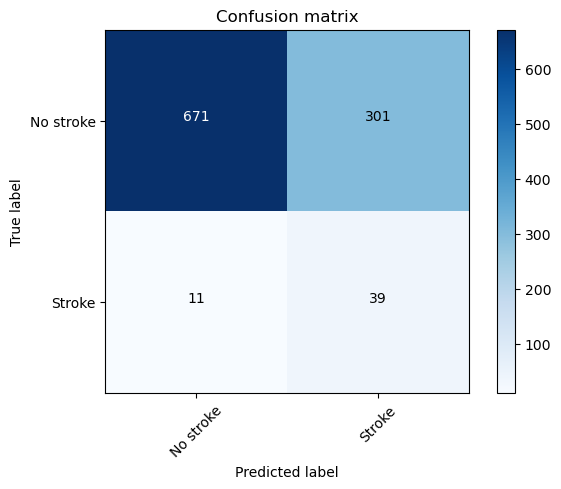

In [114]:
utils.plot_confusion_matrix(cm=cm_lineal, classes=['No stroke', 'Stroke'])

              precision    recall  f1-score   support

           0       0.98      0.69      0.81       972
           1       0.11      0.78      0.20        50

    accuracy                           0.69      1022
   macro avg       0.55      0.74      0.51      1022
weighted avg       0.94      0.69      0.78      1022



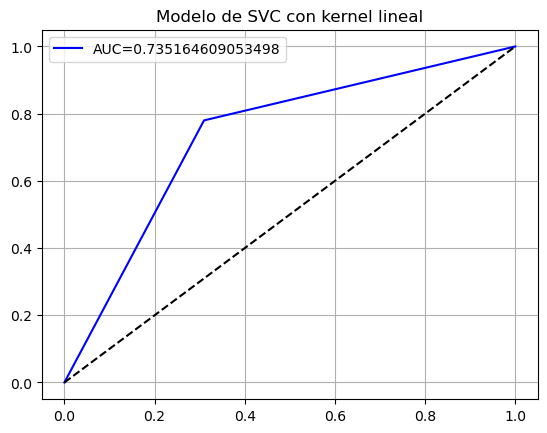

In [115]:
utils.print_metrics(y_test, y_pred_lineal, "Modelo de SVC con kernel lineal")

Confusion matrix, without normalization
[[759 213]
 [ 18  32]]


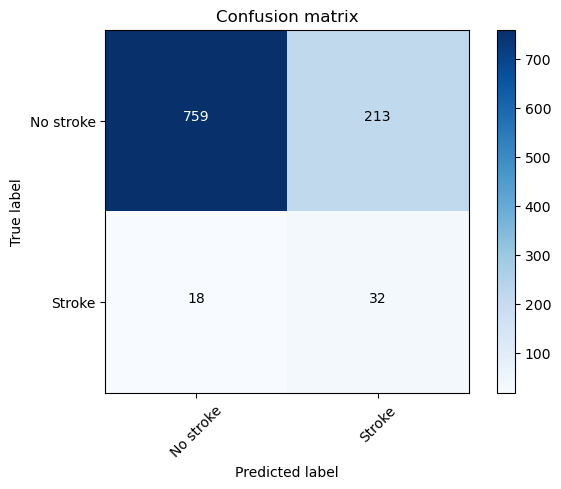

In [116]:
utils.plot_confusion_matrix(cm=cm_poly, classes=['No stroke', 'Stroke'])

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       972
           1       0.13      0.64      0.22        50

    accuracy                           0.77      1022
   macro avg       0.55      0.71      0.54      1022
weighted avg       0.94      0.77      0.84      1022



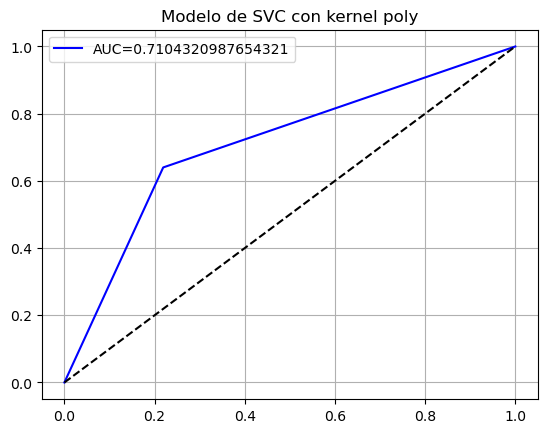

In [117]:
utils.print_metrics(y_test, y_pred_poly, "Modelo de SVC con kernel poly")

Confusion matrix, without normalization
[[777 195]
 [ 20  30]]


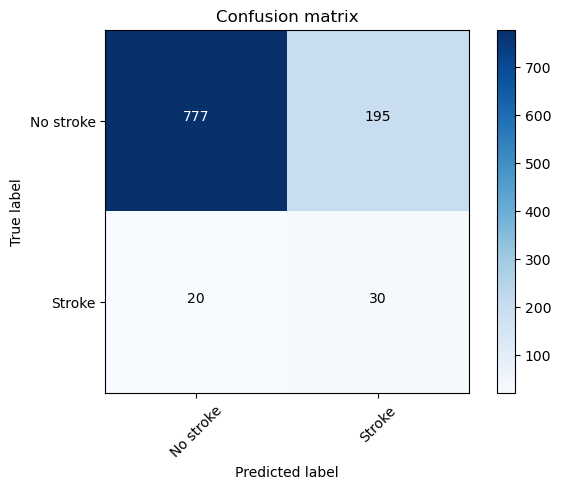

In [118]:
utils.plot_confusion_matrix(cm=cm_rbf, classes=['No stroke', 'Stroke'])

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       972
           1       0.13      0.60      0.22        50

    accuracy                           0.79      1022
   macro avg       0.55      0.70      0.55      1022
weighted avg       0.93      0.79      0.85      1022



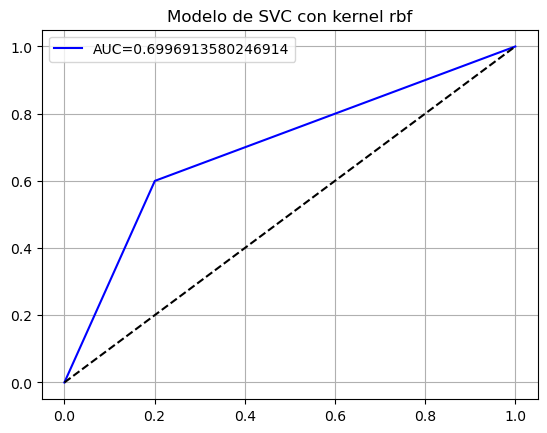

In [119]:
utils.print_metrics(y_test, y_pred_rbf, "Modelo de SVC con kernel rbf")

**Tras la búsqueda parámetrica se observa que el mejor modelo en función de AUC es el SVC lineal**

## Importancia de las variables

In [120]:
svc_lineal_model.feature_names_in_

array(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

The weights obtained from svm.coef_ represent the vector coordinates which are orthogonal to the hyperplane and their direction indicates the predicted class. The absolute size of the coefficients in relation to each other can then be used to determine feature importance for the data separation task.

As you can see below, the plot provides useful insight into what features are **being used by the model to make the positive and negative classifications from the dataset**.

https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

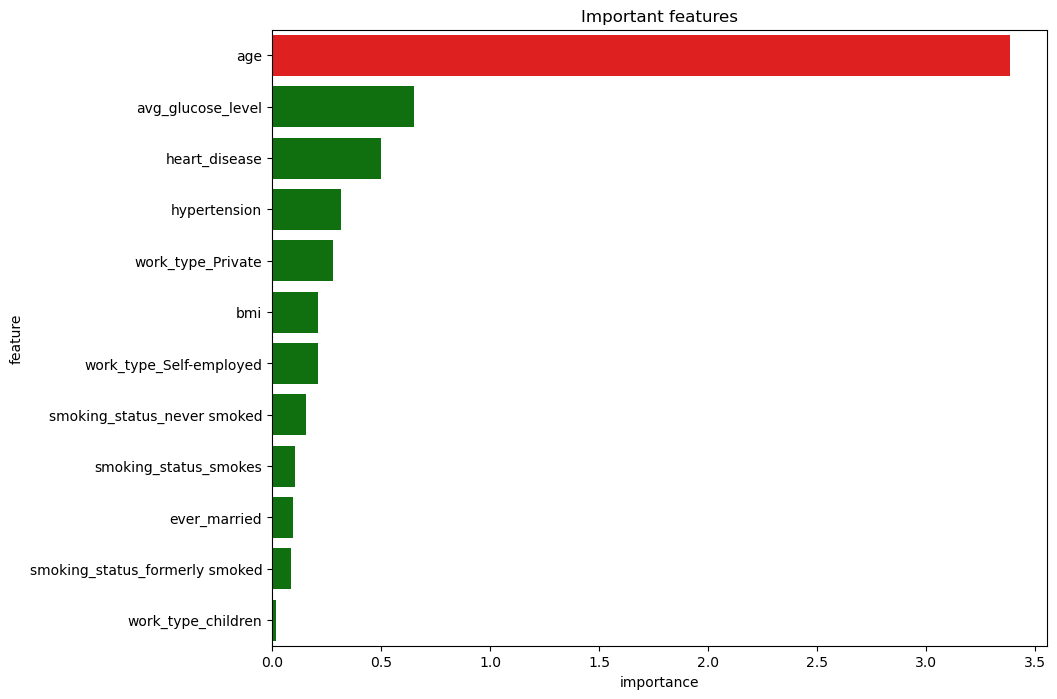

In [121]:
utils.plot_tree_feature_importance(svc_lineal_model.feature_names_in_, np.abs(svc_lineal_model.coef_[0]))

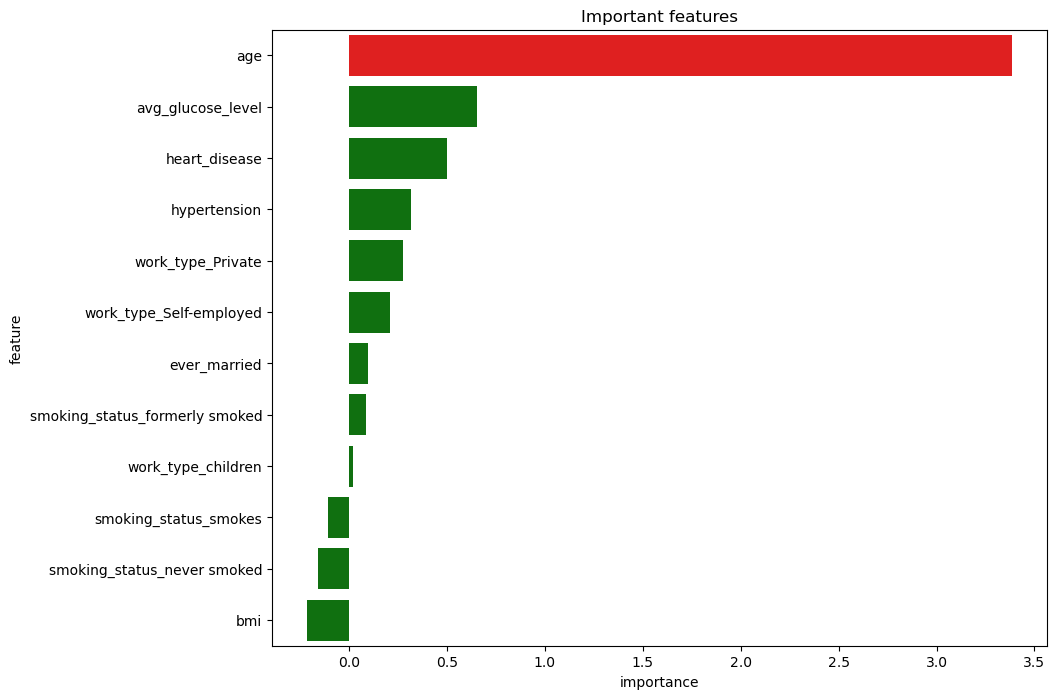

In [122]:
utils.plot_tree_feature_importance(svc_lineal_model.feature_names_in_, svc_lineal_model.coef_[0])

**Guardamos el modelo para la comparativa final**

In [123]:
pickle.dump(svc_lineal_model, open("svc_lineal_model.sav", 'wb'))